# King County House Price Regression Model - IBM Project 

For this IBM project, we've chosen the House Prices dataset from Kaggle, which includes details on homes sold in King County, Washington, between May 2014 and May 2015. We'll be building a Random Forest Regression Model to predict house prices. But before diving into the modelling, let's take a closer look at our dataset to understand what we're working with.

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

***
## Data wrangling 


In [2]:
df = pd.read_csv("/Users/ambl/Documents/My_github/House price pred/kc_house_data.csv")

In [21]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [3]:
# Converting Datetime
df['date'] = pd.to_datetime(df['date'])
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [4]:
# Let's now check for missing values in our dataset. 
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df[df.duplicated(subset=['lat', 'long'], keep=False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
31,2426039314,2014-12-01,280000.0,2,1.50,1190,1265,3.0,0,0,...,7,1190,0,2005,0,98133,47.7274,-122.357,1390,1756
55,9822700295,2014-05-12,885000.0,4,2.50,2830,5000,2.0,0,0,...,9,2830,0,1995,0,98105,47.6597,-122.290,1950,5000
56,9478500640,2014-08-19,292500.0,4,2.50,2250,4495,2.0,0,0,...,7,2250,0,2008,0,98042,47.3663,-122.114,2250,4500
63,9528102996,2014-12-07,549000.0,3,1.75,1540,1044,3.0,0,0,...,8,1540,0,2014,0,98115,47.6765,-122.320,1580,3090
73,5416510140,2014-07-10,360000.0,4,2.50,2380,5000,2.0,0,0,...,8,2380,0,2005,0,98038,47.3608,-122.036,2420,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21595,1972201967,2014-10-31,520000.0,2,2.25,1530,981,3.0,0,0,...,8,1480,50,2006,0,98103,47.6533,-122.346,1530,1282
21598,8956200760,2014-10-13,541800.0,4,2.50,3118,7866,2.0,0,2,...,9,3118,0,2014,0,98001,47.2931,-122.264,2673,6500
21607,2997800021,2015-02-19,475000.0,3,2.50,1310,1294,2.0,0,0,...,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509


It appears we have many duplicates. Let's only keep one randomly from the lat-long pairs and drop the rest.

In [6]:
# Shuffle the DataFrame and Set the random seed to 5 
df = df.sample(frac=1, random_state=5)


df.drop_duplicates(subset=['lat', 'long'], keep='first', inplace=True)


df[df.duplicated(subset=['lat', 'long'], keep=False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [7]:
df[df.duplicated(subset=['id'], keep=False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


***
## Exploratory Data Analysis

Lets' see some comparions between different features and their effect on the average price in this dataset


<Axes: title={'center': 'Average Price per Grade'}, xlabel='Grade', ylabel='Average Price (USD per million)'>

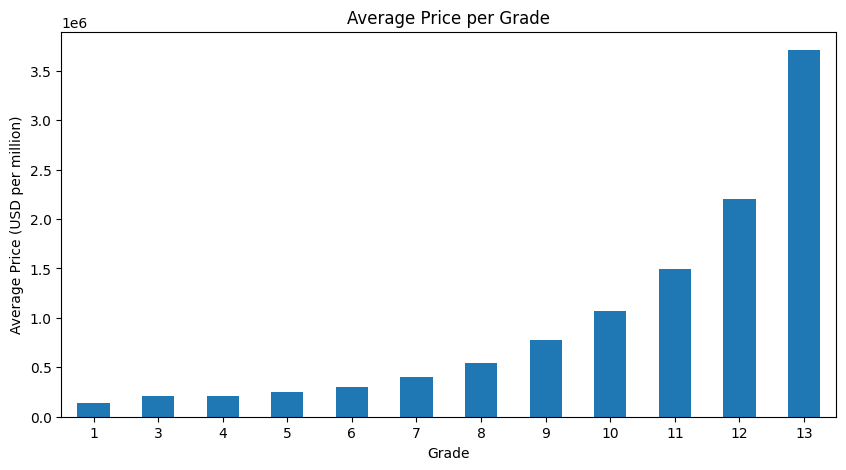

In [8]:
df.groupby('grade')['price'].mean().plot(
    kind='bar', 
    figsize=(10, 5), 
    title='Average Price per Grade', 
    ylabel='Average Price (USD per million)', 
    xlabel='Grade',
    rot=0
)

It’s clear from the data that higher grades correspond to higher prices. The graph shows that Grade 13 houses can reach up to $3.5 million, while Grade 1 houses typically fall below $500,000.

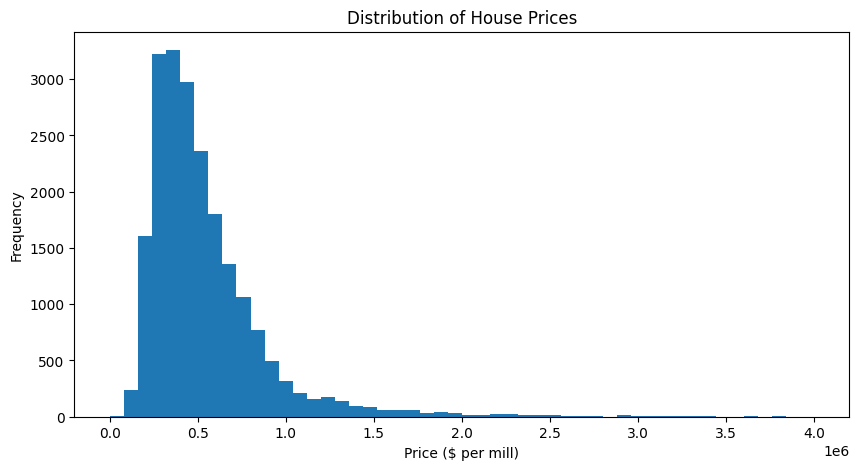

In [9]:
# Distribution of the Sales
df['price'].plot(
    kind='hist', 
    bins=50,
    figsize=(10, 5), 
    title='Distribution of House Prices', 
    ylabel='Frequency', 
    xlabel='Price ($ per mill)',
    range=(0, 4e6)
)

plt.show()

As expected, people are buying around the 500K range. It's cheaper and you get to have a house already.

In [10]:
# checking the Price columns stats
print(df['price'].describe().apply(lambda x: f'{x:,.2f}'))

count       20,832.00
mean       542,770.21
std        370,679.90
min         75,000.00
25%        322,500.00
50%        450,000.00
75%        649,950.00
max      7,700,000.00
Name: price, dtype: object


In [11]:
# using quantile for different purposes in EDA to see the comparison with the price 
q25, q40, q50, q60, q75 = df['price'].quantile([0.25, 0.4, 0.5, 0.6, 0.75])

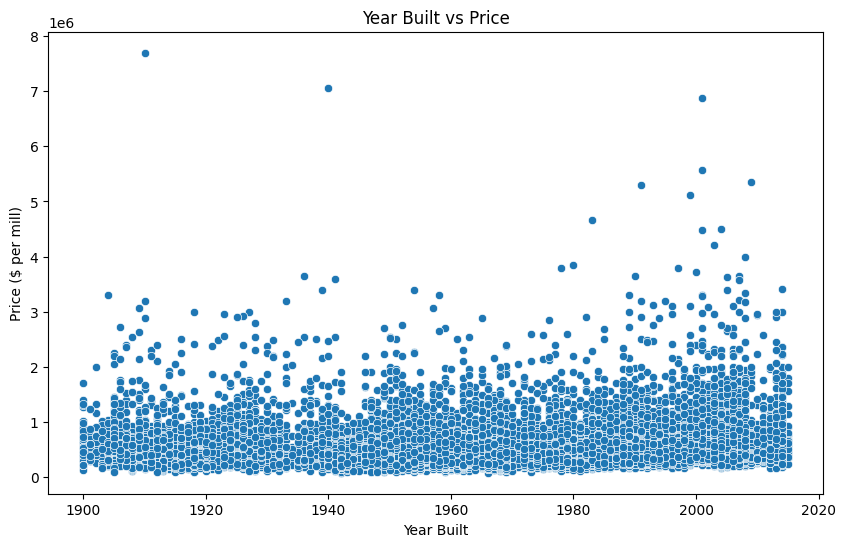

In [12]:
# Age Condition
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='yr_built', y='price')
plt.title('Year Built vs Price')
plt.xlabel('Year Built')
plt.ylabel('Price ($ per mill)')
plt.show()

In [13]:
# Calculate the correlation for justify the plot 
df[['yr_built', 'price']].corr()

,yr_built,price
yr_built,1.000000,0.056439
price,0.056439,1.000000


It appears like there is no clear correlation. The houses that were built around 1900s had somehow the same price with the houses around 2000s. 

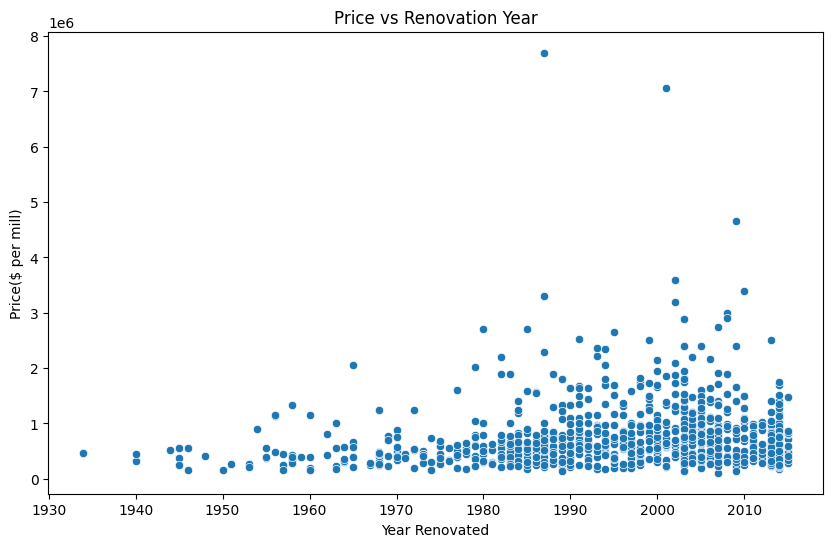

In [14]:
# checking the renovation year vs price
houses_renovated = df[df['yr_renovated'] != 0]

plt.figure(figsize=(10,6))
sns.scatterplot(data=houses_renovated, x='yr_renovated', y='price')
plt.title('Price vs Renovation Year')
plt.xlabel('Year Renovated')
plt.ylabel('Price($ per mill)')
plt.show()

In [15]:
# Calculate the correlation for justify the plot 
df[['yr_renovated', 'price']].corr()


,yr_renovated,price
yr_renovated,1.000000,0.126875
price,0.126875,1.000000


In [16]:

def price_category(price):
    '''
    function to analyse the locations
    arg : target column /price
    returns a number between 0 and 1 based on the price category
     '''
    if price <= q25:
        return (q25 - price) / (q50 - q25) + 1    # Values range from 2 (at the minimum price) to 1 (at the 25th percentile)
    elif price <= q50:
        return 1 - (price - q25) / (q50 - q25)    # Values range from 1 (at the 25th percentile) to 0 (at the median):
    elif price <= q75:
        return (price - q50) / (q75 - q50)        # Values range from 0 (at the median) to 1 (at the 75th percentile)
    else:
        return 1 + (price - q75) / (q75 - q50)    # Values start at 1 (at the 75th percentile) and increase from there

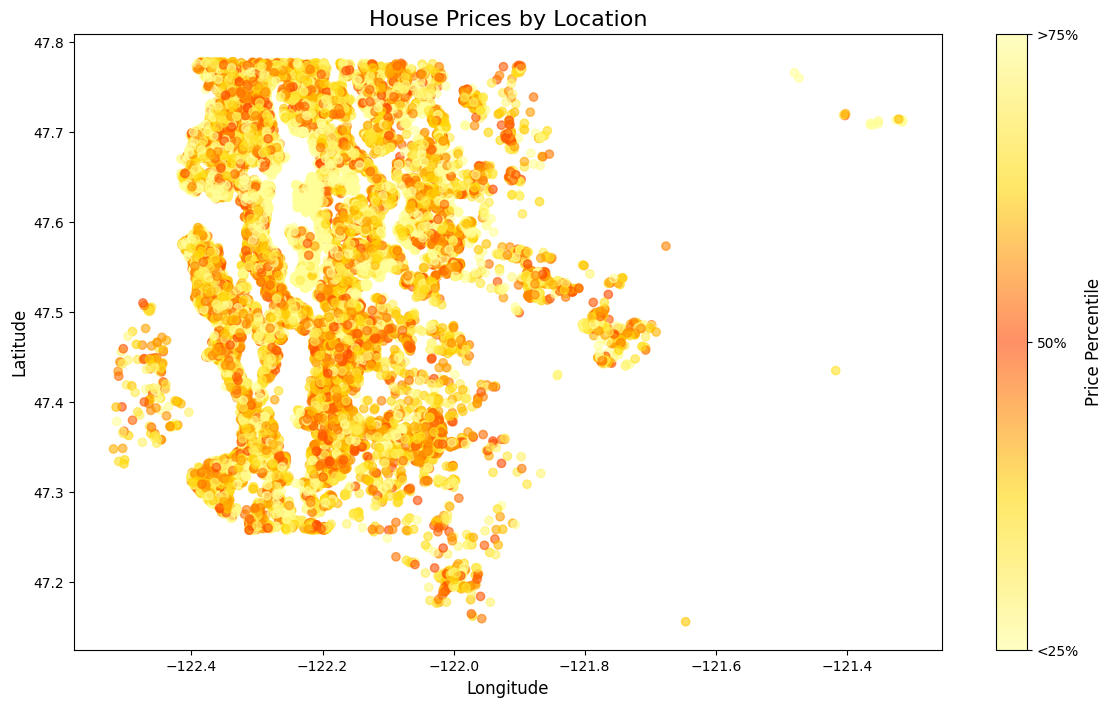

In [17]:
df['price_category'] = df['price'].apply(price_category)


colors = ['#FFFF99', '#FFD700', '#FF4500', '#FFD700', '#FFFF99']
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)


plt.figure(figsize=(14, 8))
scatter = plt.scatter(df['long'], df['lat'], 
                      c=df['price_category'], 
                      cmap=cmap, 
                      vmin=0, vmax=2,
                      alpha=0.6)
plt.title('House Prices by Location', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

cbar = plt.colorbar(scatter)
cbar.set_ticks([0, 1, 2])
cbar.set_ticklabels(['<25%', '50%', '>75%'])
cbar.set_label('Price Percentile', fontsize=12)

plt.show()

It appears that even the houses in the 50% range are spread across the map. Let's try to display only the houses around the 50% range.

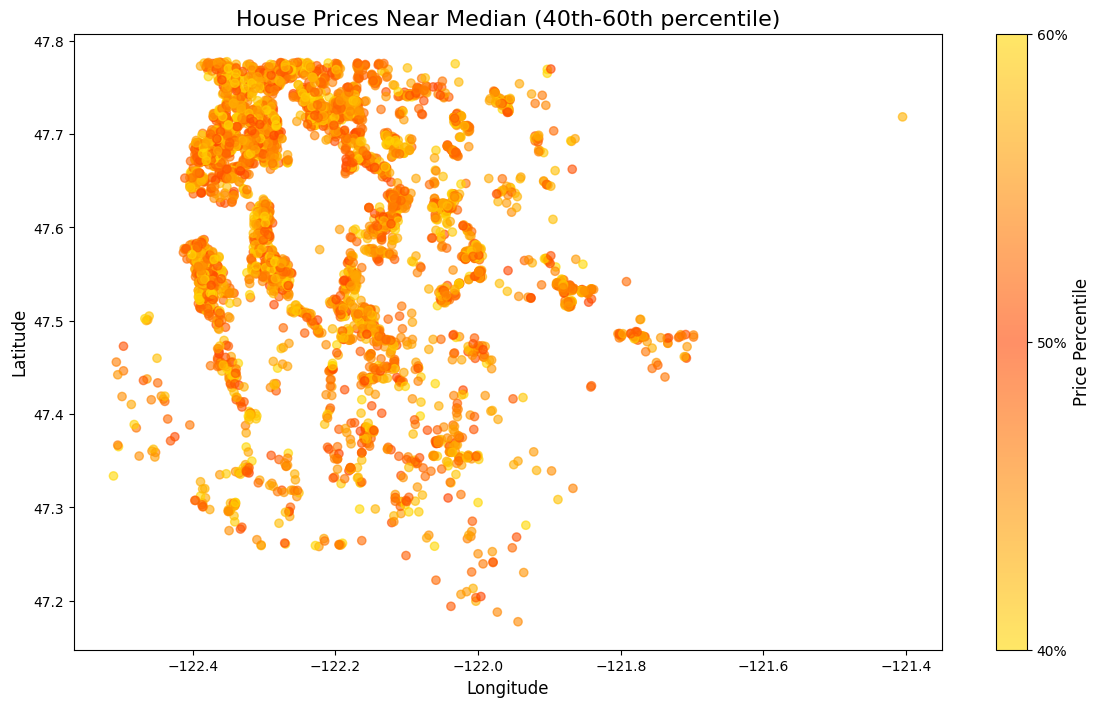

In [18]:
''' 
Create a function to assign categories based on price ranges
arg: target feature / price 
reture : new value based on the middle q
''' 
def price_category(price):
    if q40 <= price <= q60:
        return (price - q40) / (q60 - q40)
    else:
        return np.nan  # This will exclude the point from the plot


df['price_category'] = df['price'].apply(price_category)


colors = ['#FFD700', '#FF4500', '#FFD700']  # Yellow to red to yellow
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)

# Create the scatter plot
plt.figure(figsize=(14, 8))
scatter = plt.scatter(df['long'], df['lat'], 
                      c=df['price_category'], 
                      cmap=cmap, 
                      alpha=0.6,
                      vmin=0, vmax=1)


plt.title('House Prices Near Median (40th-60th percentile)', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)


cbar = plt.colorbar(scatter)
cbar.set_ticks([0, 0.5, 1])
cbar.set_ticklabels(['40%', '50%', '60%'])
cbar.set_label('Price Percentile', fontsize=12)

plt.show()

Again the 50%percentile is spreaded but most of them are closer to the north

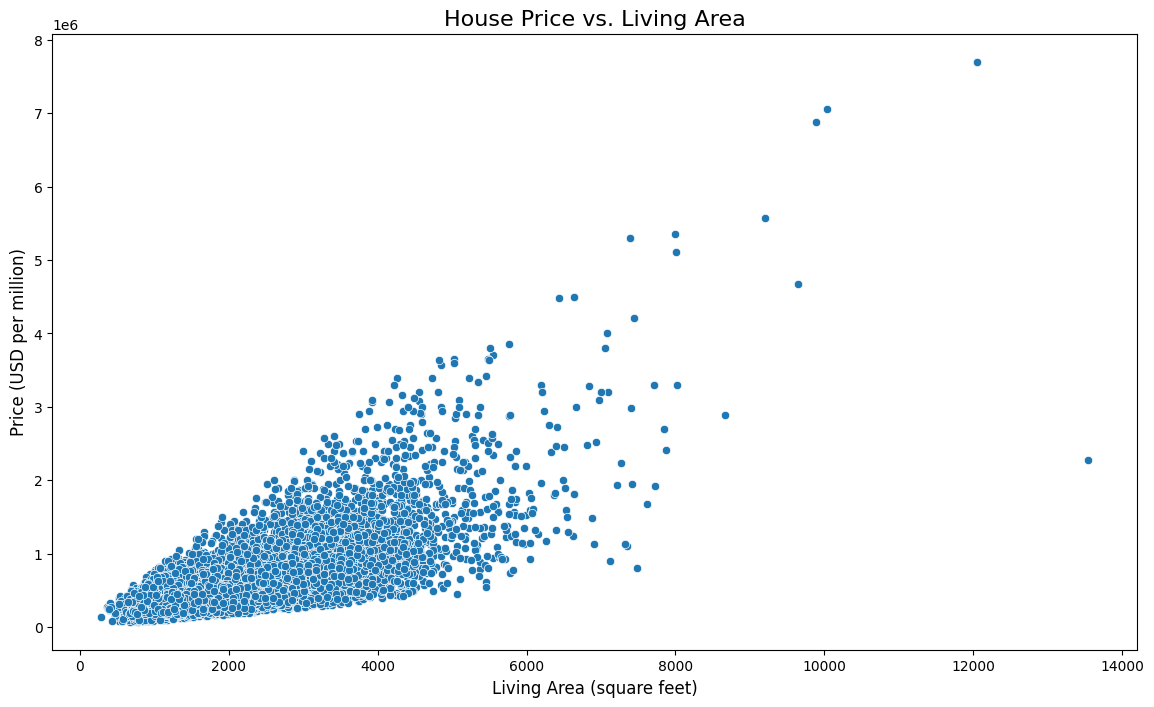

In [19]:
# relationship between size of the houses and price

plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='sqft_living', y='price')
plt.title('House Price vs. Living Area', fontsize=16)
plt.xlabel('Living Area (square feet)', fontsize=12)
plt.ylabel('Price (USD per million)', fontsize=12)
plt.show()

In [20]:

# Calculate the correlation coefficient
df[['sqft_living', 'price']].corr()


,sqft_living,price
sqft_living,1.000000,0.703503
price,0.703503,1.000000


We have a good graph here. According to the graph, we can see a good correlation between the Price and Size. As the size increases, the Price is seen to increase as well.


In [21]:
# exploring the correlation of the numerical features of the 25% to 75% range
mid_df = df[(df['price'] >= q25) & (df['price'] <= q75)]
mid_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_category
17485,2621760290,2014-08-27,365000.0,4,2.50,2800,6820,2.0,0,0,...,2800,0,1997,0,98042,47.3695,-122.108,2060,6820,NaN
18449,4365200865,2014-09-02,384950.0,3,1.00,1540,7740,1.0,0,0,...,1540,0,1909,0,98126,47.5220,-122.375,1220,7740,NaN
14864,686450330,2014-09-15,575000.0,4,2.25,2060,12155,1.0,0,0,...,2060,0,1968,0,98008,47.6378,-122.117,2360,8625,NaN
15262,4012800010,2014-05-06,360000.0,4,2.00,2680,18768,1.0,0,0,...,2680,0,1965,0,98001,47.3182,-122.279,1230,15750,NaN
13489,1426079047,2014-09-11,620000.0,3,2.25,2520,212137,2.0,0,0,...,1590,930,2005,0,98019,47.7384,-121.878,2000,212137,NaN


Let's plot it using a Correlation Matrix.

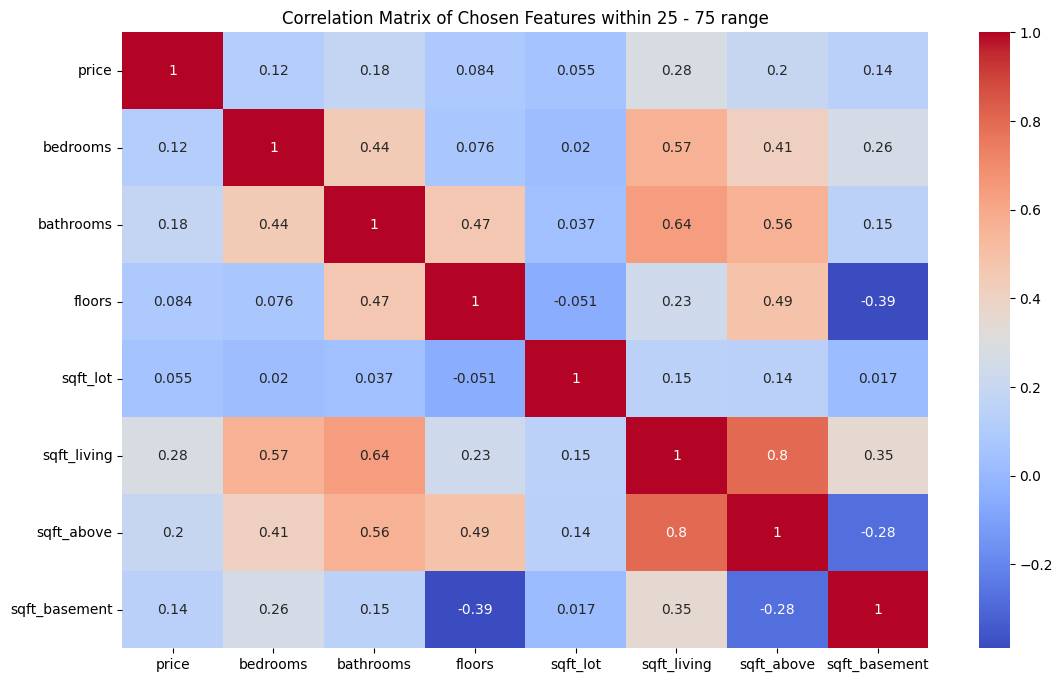

In [22]:
# picking some numerical columns for correlation 
chosen_columns = ['price', 'bedrooms', 'bathrooms', 'floors', 'sqft_lot', 'sqft_living', 'sqft_above', 'sqft_basement']
# Calculate the correlation matrix
corr_matrix = mid_df[chosen_columns].corr()


plt.figure(figsize=(13, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Chosen Features within 25 - 75 range')

plt.show()

***
## Pre-Modeling

In [23]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 
            'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 
            'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

X = df[features]   # independet / feature columns
y = df['price']  # target columen

In [24]:
'''
The code block above produced the following `X,y` pairs:
1. `X_train`, `y_train` - For training the model
2. `X_val`, `y_val` - For validating the model
3. `X_test`, `y_test` - For testing the model
'''

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=5)  # 0.25 x 0.8 = 0.2



In [25]:
# Scaling the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## Model Training

In [26]:
# Creating and Fitting
model = RandomForestRegressor(n_estimators=100, random_state=5)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=5)

In [27]:
# Predicting the Training Set
y_train_pred = model.predict(X_train_scaled)

In [28]:
# Error Analysis
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)      
train_mse = mean_squared_error(y_train, y_train_pred)                   
train_rmse = np.sqrt(train_mse)                                         
train_r2 = r2_score(y_train, y_train_pred)                       

print(f'Root Mean Squared Error: ${train_rmse:,.2f}')
print(f'Mean Absolute Percentage Error: {train_mape:.4f}')
print(f'Mean Squared Error : {train_mse:.4f}')
print(f'R-squared Score: {train_r2:.4f}')

Root Mean Squared Error: $49,942.58
Mean Absolute Percentage Error: 0.0489
Mean Squared Error : 2494261786.0898
R-squared Score: 0.9825


In [29]:
y_val_pred = model.predict(X_val_scaled)

### Validation Set Error Analysis


In [30]:
val_mape = mean_absolute_percentage_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Root Mean Squared Error: ${val_rmse:,.2f}")
print(f"Mean Absolute Percentage Error: {val_mape:.4f}")
print(f"R-squared Score: {val_r2:.4f}")

Root Mean Squared Error: $133,432.36
Mean Absolute Percentage Error: 0.1352
R-squared Score: 0.8627


The results indicate that our model is performing effectively on the validation set, with an RMSE of $133,432.36, a MAPE of 13.52%, and a strong R-squared score of 86.27%. A perfect score isn’t necessary; an 86% R-squared is already a solid result.

### Model Testing

In [31]:
y_test_pred = model.predict(X_test_scaled)

### Test set Error Analysis

In [32]:
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)


print(f"Root Mean Squared Error: ${test_rmse:,.2f}")
print(f"Mean Absolute Percentage Error: {test_mape:.4f}")
print(f"R-squared Score: {test_r2:.4f}")

Root Mean Squared Error: $132,308.67
Mean Absolute Percentage Error: 0.1324
R-squared Score: 0.8658


Our model shows strong performance on the test set, with an RMSE of $132,308.67, a MAPE of 13.24%, and an impressive R-squared score of 86.58%. A perfect score isn’t required; achieving 86.58% indicates that the model is generalizing well and avoiding overfitting.

*** 
## Model Improvement

In [34]:
# Inspecting Feature Importance
imortant_features = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
imortant_features = imortant_features.sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(imortant_features)


Feature Importance:
          feature  importance
2     sqft_living    0.391275
8           grade    0.205644
13            lat    0.156460
14           long    0.077149
15  sqft_living15    0.030783
11       yr_built    0.024593
5      waterfront    0.022025
9      sqft_above    0.020408
6            view    0.016851
16     sqft_lot15    0.016277
3        sqft_lot    0.014647
1       bathrooms    0.007673
10  sqft_basement    0.005778
0        bedrooms    0.002941
12   yr_renovated    0.002852
7       condition    0.002515
4          floors    0.002128


<Figure size 1400x800 with 0 Axes>

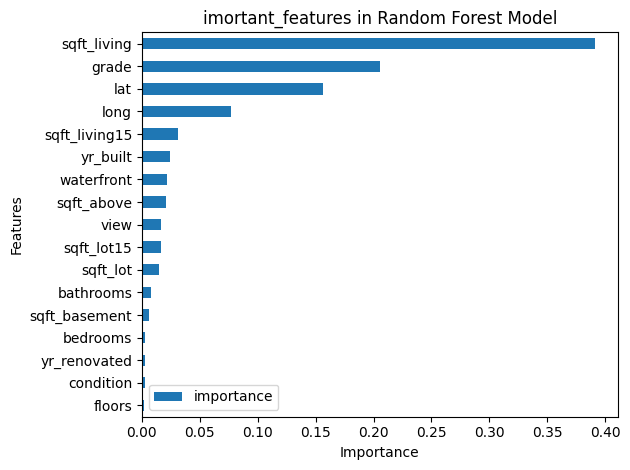

In [35]:
plt.figure(figsize=(14, 8))
imortant_features.sort_values('importance', ascending=True).plot(kind='barh', x='feature', y='importance')
plt.title('imortant_features in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

Looks like our Big 4 are sqft_living, grade, lat and long. When we were doing our exploratory analysis, we also had the same hypothesis what affects the price: "Size", "Location" and "Grade". Let's store the top features in a list.

In [36]:
# Select the Top 10 Features
top_features = imortant_features.nlargest(10, 'importance')['feature'].tolist()
top_features

['sqft_living',
 'grade',
 'lat',
 'long',
 'sqft_living15',
 'yr_built',
 'waterfront',
 'sqft_above',
 'view',
 'sqft_lot15']

In [37]:
# Applying Top Features
X_train_top = X_train[top_features]
X_val_top = X_val[top_features]
X_test_top = X_test[top_features]

In [38]:
# scaling top features
X_train_top_scaled = scaler.fit_transform(X_train_top)
X_val_top_scaled = scaler.transform(X_val_top)
X_test_top_scaled = scaler.transform(X_test_top)

In [39]:
model.fit(X_train_top_scaled, y_train)

RandomForestRegressor(random_state=5)

In [40]:
def evaluate_model_performance(model, X, y, dataset_name="Dataset"):
    """
    Evaluates and prints the performance of the model on a given dataset.

    args:
    model: The trained model to evaluate.
    X (array-like): The input features of the dataset.
    y (array-like): The true labels of the dataset.
    dataset_name (str): The name of the dataset being evaluated (e.g., "Training Set").

    return: 
    the exmined error for each data set 
    """
    y_pred = model.predict(X)
    
    mape = mean_absolute_percentage_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)
    
    print(f"{dataset_name} Results:")
    print(f"Root Mean Squared Error: ${rmse:,.2f}")
    print(f"Mean Absolute Percentage Error: {mape:.4f}")
    print(f"R-squared Score: {r2:.4f}\n")


evaluate_model_performance(model, X_train_top_scaled, y_train, "Training Set")
evaluate_model_performance(model, X_val_top_scaled, y_val, "Validation Set")
evaluate_model_performance(model, X_test_top_scaled, y_test, "Test Set")

Training Set Results:
Root Mean Squared Error: $49,246.71
Mean Absolute Percentage Error: 0.0496
R-squared Score: 0.9830

Validation Set Results:
Root Mean Squared Error: $132,745.28
Mean Absolute Percentage Error: 0.1381
R-squared Score: 0.8641

Test Set Results:
Root Mean Squared Error: $131,962.40
Mean Absolute Percentage Error: 0.1343
R-squared Score: 0.8665



### Getting the Best Hyperparameters

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(5, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None] + [0.3, 0.5, 0.7, 1.0]
}

rf = RandomForestRegressor(random_state=5)

# the random search model
rd_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                   n_iter=100, cv=3, random_state=5, n_jobs=-1)


rd_search.fit(X_train_scaled, y_train)

print(rd_search.best_params_)


best_rf = rd_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: ${rmse:.2f}")
print(f"R-squared Score: {r2:.4f}")

In [42]:
# a new model with these hyperparameters.
model = RandomForestRegressor(
    max_depth = 38, 
    max_features = 0.7,
    min_samples_leaf = 1, 
    min_samples_split = 3, 
    n_estimators = 810,
    random_state = 5 # So we can ensure replication
)

In [45]:
model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=38, max_features=0.7, min_samples_split=3,
                      n_estimators=810, random_state=5)

In [46]:
# using the evaludate model perfonce function with the new args
evaluate_model_performance(model, X_train_scaled, y_train, "Training Set")
evaluate_model_performance(model, X_val_scaled, y_val, "Validation Set")
evaluate_model_performance(model, X_test_scaled, y_test, "Test Set")

Training Set Results:
Root Mean Squared Error: $51,731.72
Mean Absolute Percentage Error: 0.0500
R-squared Score: 0.9812

Validation Set Results:
Root Mean Squared Error: $132,810.19
Mean Absolute Percentage Error: 0.1343
R-squared Score: 0.8640

Test Set Results:
Root Mean Squared Error: $129,267.16
Mean Absolute Percentage Error: 0.1315
R-squared Score: 0.8719



### Combining the new Model and Top Features
Let us now attempt to combine the two model improvement techniques we have done to see if it will improve the model even further.

In [47]:
model.fit(X_train_top_scaled, y_train)

RandomForestRegressor(max_depth=38, max_features=0.7, min_samples_split=3,
                      n_estimators=810, random_state=5)

In [48]:
# using the evaludate model perfonce function with the new args
evaluate_model_performance(model, X_train_top_scaled, y_train, "Training Set")
evaluate_model_performance(model, X_val_top_scaled, y_val, "Validation Set")
evaluate_model_performance(model, X_test_top_scaled, y_test, "Test Set")

Training Set Results:
Root Mean Squared Error: $51,206.73
Mean Absolute Percentage Error: 0.0509
R-squared Score: 0.9816

Validation Set Results:
Root Mean Squared Error: $130,221.21
Mean Absolute Percentage Error: 0.1368
R-squared Score: 0.8692

Test Set Results:
Root Mean Squared Error: $129,997.93
Mean Absolute Percentage Error: 0.1327
R-squared Score: 0.8704



***
## Result:

During the validation phase, Method 4 (Random Forest Model with Optimized Hyperparameters and Top Features) yielded the most promising results. It achieved the lowest RMSE at $130,221.21 and the highest R² score of 86.92% compared to other methods.
